## Q3. Decision Tree Classifier for Drug Dataset

In [2]:
#Importing Data
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
#Reading Data
data = pd.read_csv(r'C:\Users\patil\OneDrive\Desktop\JYPN\Datasets\drug.csv')
data.head()

,Age,Gender,BP,Cholesterol,SodiumPotassium,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
#Label Encoding the categorical data to get numercial data
from sklearn.preprocessing import LabelEncoder
le_gen = LabelEncoder()
le_bp = LabelEncoder()
le_chol = LabelEncoder()

In [5]:
data.Gender = le_gen.fit_transform(data.Gender)
data.BP = le_bp.fit_transform(data.BP)
data.Cholesterol = le_chol.fit_transform(data.Cholesterol)
data.head(2)

,Age,Gender,BP,Cholesterol,SodiumPotassium,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC


## Traning a Decision Tree without Gender and Age Parameter

In [6]:
#Extracing input data without gender and age
x_data = data.drop({'Gender','Age','Drug'}, axis=1)
x_data.head(2)

,BP,Cholesterol,SodiumPotassium
0,0,0,25.355
1,1,0,13.093


In [7]:
y_data = data.Drug
y_data.head(2)

0    drugY
1    drugC
Name: Drug, dtype: object

In [8]:
x_train_50, x_test_50, y_train_50, y_test_50 = train_test_split(x_data, y_data, test_size=0.5, random_state=21)

In [9]:
dtc_50 = DecisionTreeClassifier(random_state=50)

dtc_50.fit(x_train_50, y_train_50)

DecisionTreeClassifier(random_state=50)

In [30]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_50,dtc_50.predict(x_test_50) )
print(cm, end='\n\n')
acc_50 = accuracy_score(y_test_50, dtc_50.predict(x_test_50))

print(acc_50*100,'%')
print(round((1-acc_50)*100,2),'%')

[[ 7  5  0  0  0]
 [ 5  5  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 27  0]
 [ 0  0  0  0 45]]

90.0 %
10.0 %


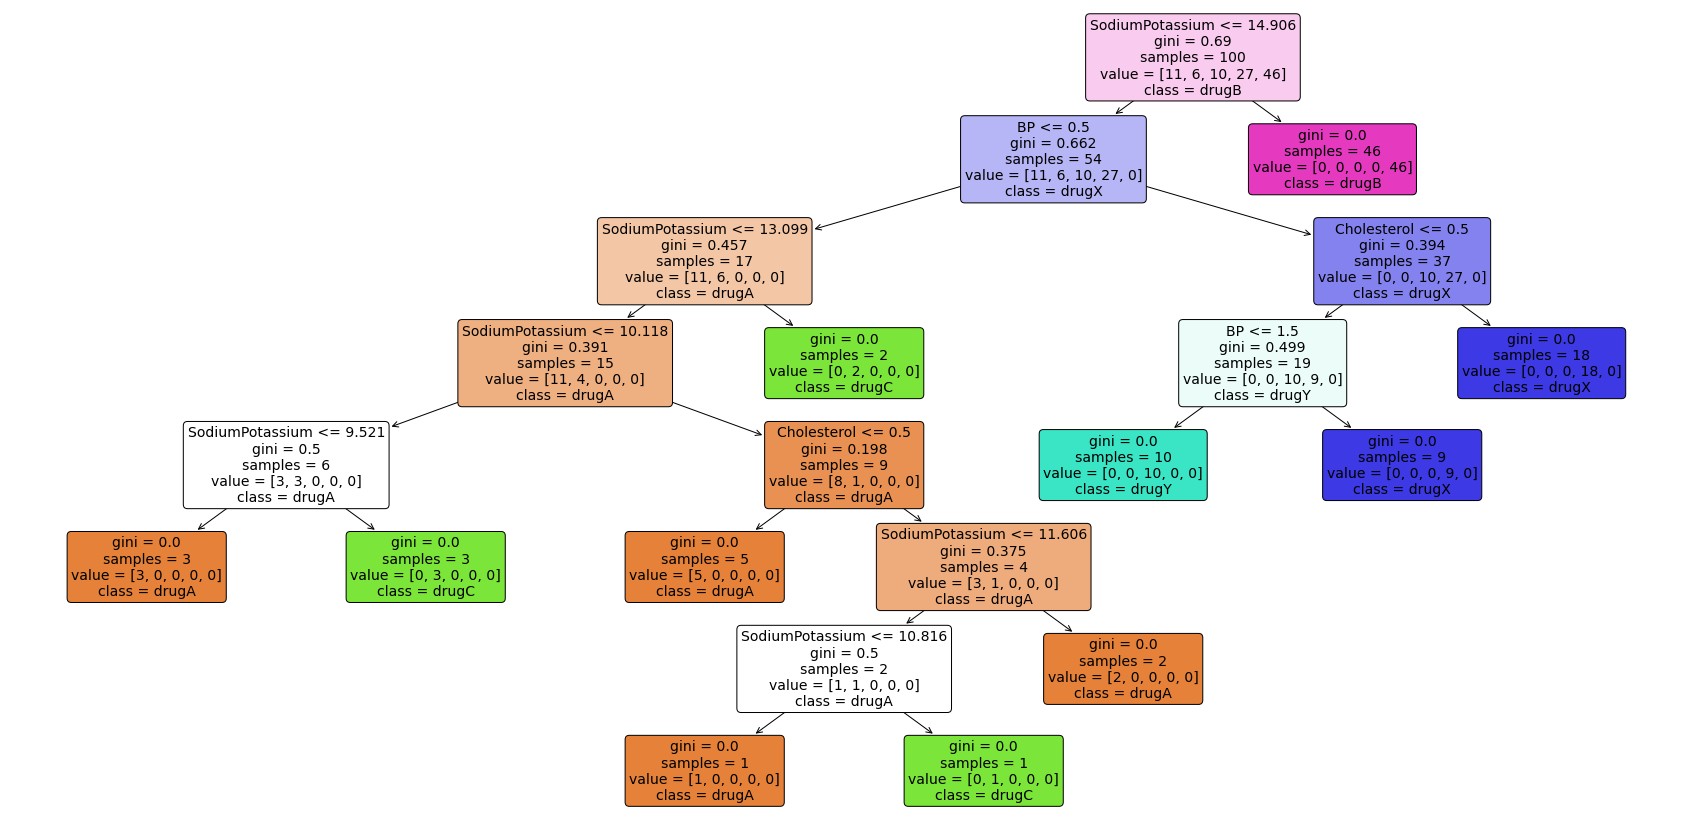

In [11]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15), facecolor ='w')

a = tree.plot_tree(dtc_50,
                   feature_names = x_train_50.columns,
                   class_names = y_train_50.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()

In [12]:
x_train_80, x_test_20, y_train_80, y_test_20 = train_test_split(x_data, y_data, test_size=0.2, random_state=51)

In [13]:
dtc_80 = DecisionTreeClassifier(random_state=80)
dtc_80.fit(x_train_80, y_train_80)

DecisionTreeClassifier(random_state=80)

In [29]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_20,dtc_80.predict(x_test_20) )
print(cm, end='\n\n')
acc_80 = accuracy_score(y_test_20, dtc_80.predict(x_test_20))

print(acc_80*100, '%')
print(round((1-acc_80)*100,2), '%')

[[ 2  2  0  0  0]
 [ 1  1  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 18]]

92.5 %
7.5 %


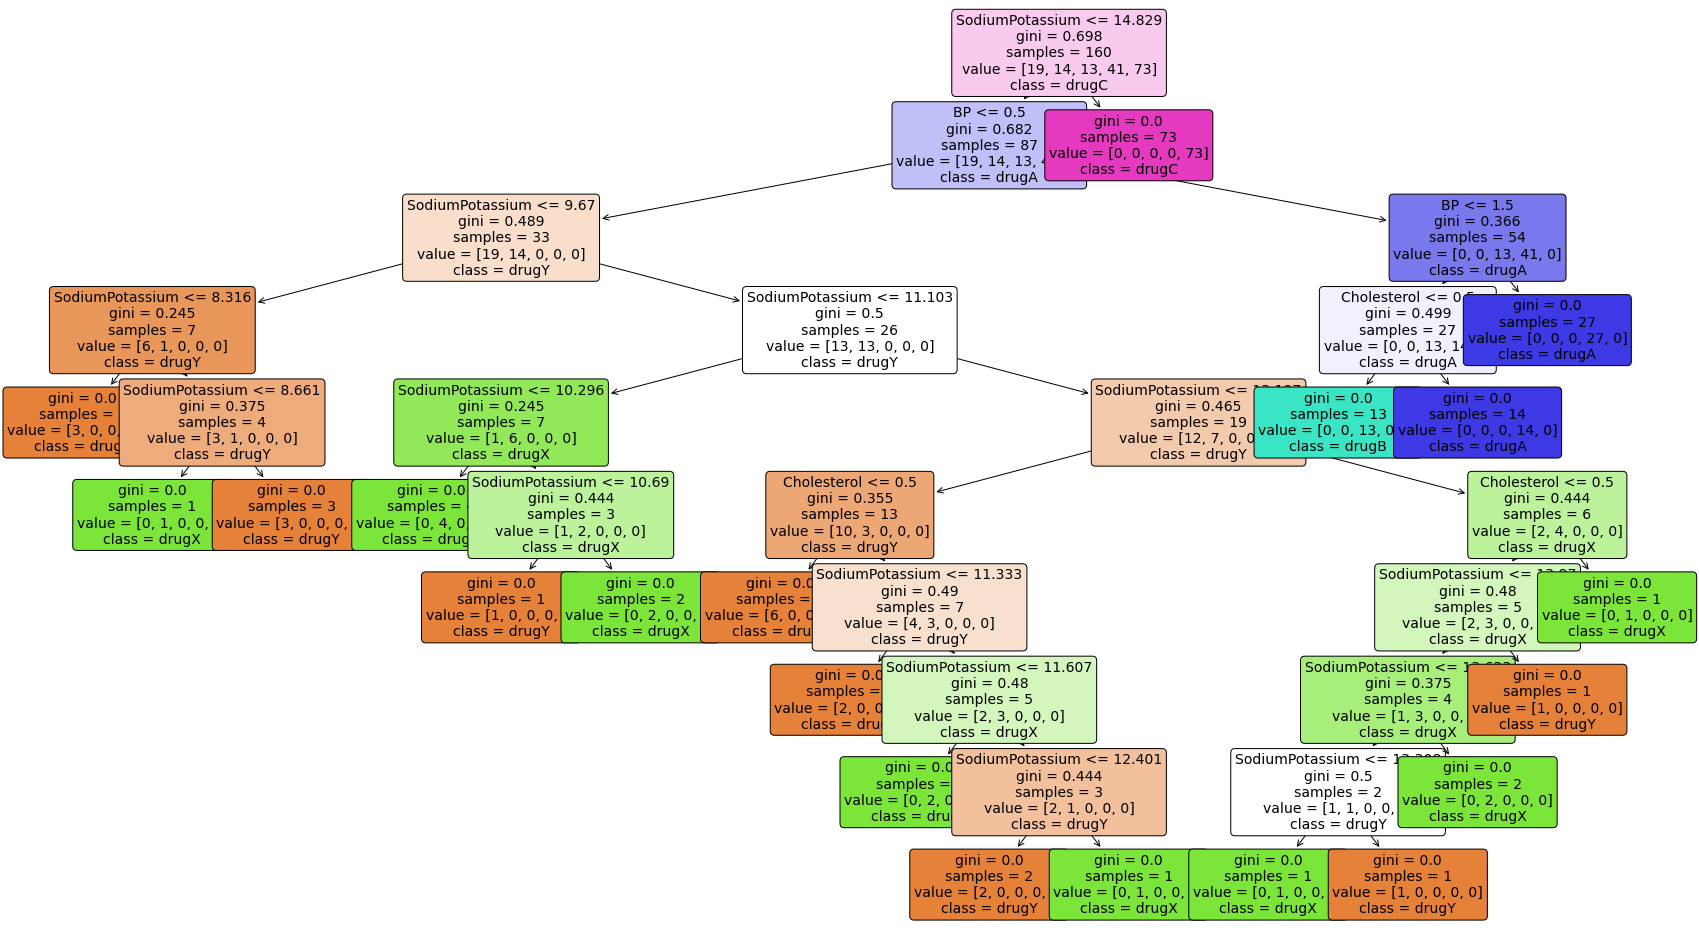

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,17), facecolor ='w')

a = tree.plot_tree(dtc_80,
                   feature_names = x_train_80.columns,
                   class_names = y_train_80.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()

## Traning a Decision Tree with Gender and Age Parameter

In [16]:
#Extracing input data with all parameters (including gender and age)
x_data_ga = data.drop('Drug', axis=1)
x_data_ga.head(2)

,Age,Gender,BP,Cholesterol,SodiumPotassium
0,23,0,0,0,25.355
1,47,1,1,0,13.093


In [17]:
#Extracting output data
y_data_ga = data.Drug
y_data_ga.head(2)

0    drugY
1    drugC
Name: Drug, dtype: object

In [18]:
#Splitting data into 50-50
x_train_50_ga, x_test_50_ga, y_train_50_ga, y_test_50_ga = train_test_split(x_data_ga, y_data_ga, test_size=0.5, random_state=99)

In [19]:
#Traning a decision tree with 50-50 split data
dtc_50_ga = DecisionTreeClassifier(random_state=881)
dtc_50_ga.fit(x_train_50_ga, y_train_50_ga)

DecisionTreeClassifier(random_state=881)

In [24]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_50_ga,dtc_50_ga.predict(x_test_50_ga) )
print(cm, end='\n\n')
acc_50_ga = accuracy_score(y_test_50_ga, dtc_50_ga.predict(x_test_50_ga))
print(acc_50_ga*100, '%')
print(round((1-acc_50_ga)*100,2), '%')

[[13  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0 26  1]
 [ 0  0  0  0 45]]

99.0 %
1.0 %


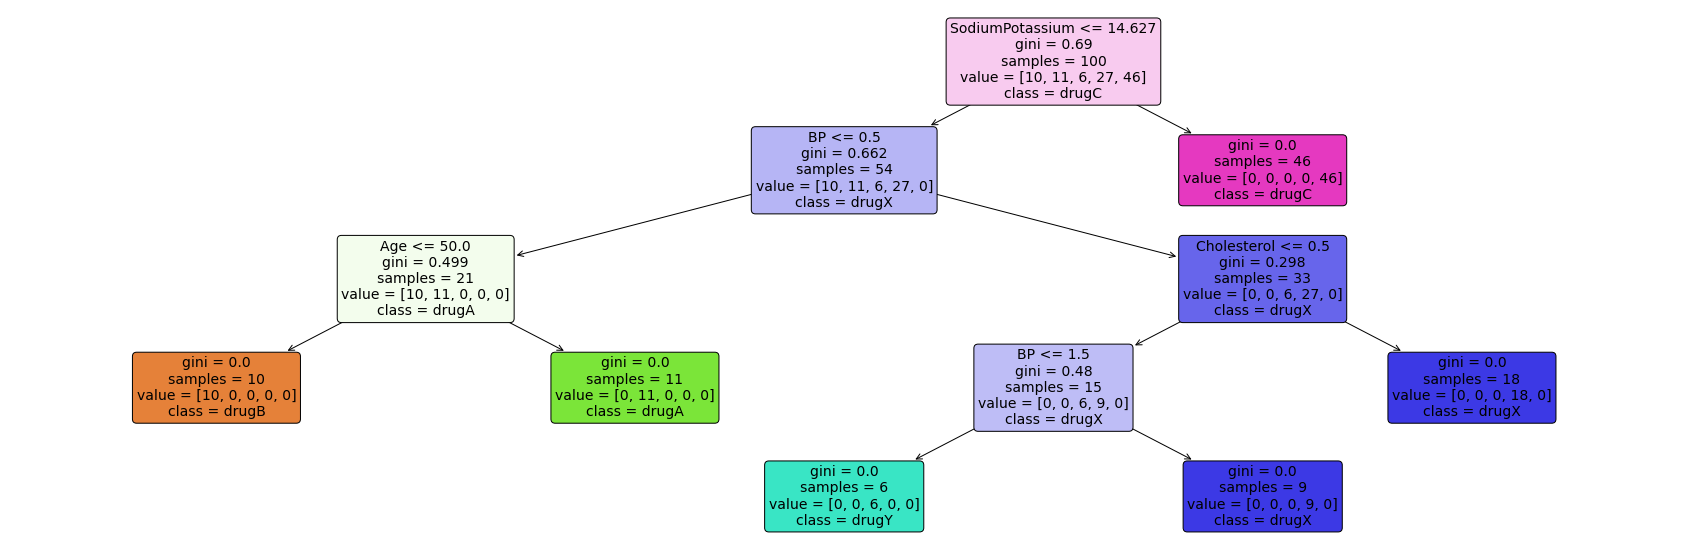

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10), facecolor ='w')

a = tree.plot_tree(dtc_50_ga,
                   feature_names = x_train_50_ga.columns,
                   class_names = y_train_50_ga.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()

#### Splitting data into 80% train data and 20% test data and traning a decision tree¶

In [25]:
x_train_80_ga, x_test_20_ga, y_train_80_ga, y_test_20_ga = train_test_split(x_data_ga, y_data_ga, test_size=0.2, random_state=651)

In [26]:
#Traning decison tree model for 80-20 split
dtc_80_ga = DecisionTreeClassifier(max_leaf_nodes=6,random_state=805)
dtc_80_ga.fit(x_train_80_ga, y_train_80_ga)

DecisionTreeClassifier(max_leaf_nodes=6, random_state=805)

#### Generating a Confusion Matrix

In [27]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_20_ga,dtc_80_ga.predict(x_test_20_ga) )
print(cm, end='\n\n')
acc_80_ga = accuracy_score(y_test_20_ga, dtc_80_ga.predict(x_test_20_ga))
print(acc_80_ga*100,'%')
print(round(1-acc_80_ga,2), '%')


[[ 4  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

100.0 %
0.0 %


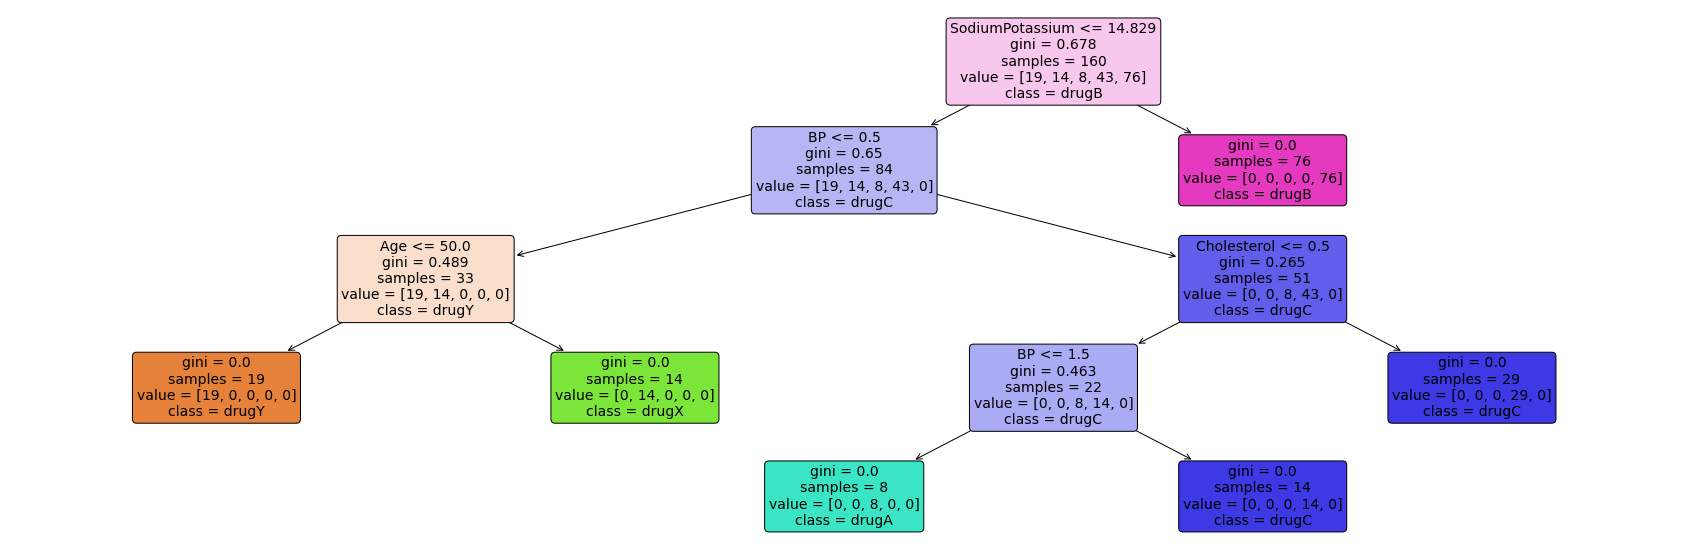

In [28]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10), facecolor ='w')
a = tree.plot_tree(dtc_80_ga,
                   feature_names = x_train_80_ga.columns,
                   class_names = y_train_80_ga.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()